# Introduction
---

A la question de :  [Pourquoi étudier la Génération de nombre Aléatoire ?](https://fr.wikipedia.org/wiki/G%C3%A9n%C3%A9rateur_de_nombres_pseudo-al%C3%A9atoires)

On peut juste repondre que la génération de nombre aléatoire joue un rôle critque dans des domaines comme la recherche et la sécurité(cryptographie) :

- Dans la recherche (scientifique) : pour des études  sur des populations ayant un certain comportement , il n'est pas toujours aisé d'aller collecter les information dont on a besoin sur le terrain (question de coût financiers , de temps ....) , mais en connaissant le **_comportement_** (hypothèses de lois statistiques ) de ces popoulations , on peut les simuler (populations) par des points , vecteurs ... Cela qui permet d'eviter toutes les contraintes physiques liées à la collecte dur le terrain cité plus haut

- En sécurite : La sécurité aujourd'hui passe principalement par la génération de code , clé , mot de passe , qui sont basiquement des suites de nombres doivent être le plus aléatoire possibles. Une approche (notre intuition naive ) aurait été de demander chaque **_code_**  à un individu **_pris au hasard_** à chaque fois qu'on en aurait besoin , afin que l'anoymat du code reste intact . Bien évidenment c'est impossible ! vu les milliers d'opérations qui necessite la génération d'un **_code_** sûr de nos jours.

C'est deux exemples ne sont pas exhaustifs et encore moins complets , mais ils mettent en quelque sorte l'évidence du besoin de pouvoir générer des nombres automatiquement , mais surtout le fait qu'ils soient **_aléatoires_** .

# 1. Etudes du caractère pseudo-aléatoires des 2 millions décimales de _e_
---

Devoir étudier ce carctère c'est vérifier si **_" Les 2 millions de décimales de e sont uniformément et aléatoirement reparties "_**  pour nous cela revient à faire des tes d'hypothèse avec comme hypothèse nulle $H_0$ : _" Les 2 millions de décimales de e suivent une loi uniforme "_  contre l'hypothèse alternative $H_1$ : _" Les 2 millions de décimales de e ne suivent pas une loi uniforme "_. 


## 1.1 Exploration et observation par des graphiques



Avant d'étudier le caractère pseudo-aléatoire des décimales de e avec des outils plus rigoureux (tests statistiques et formules mathématiques). Nous essayerons premièrement de voir ci l'hypothèse $H_0$ peut être cohérente  juste par observation. 


### Exploration
Pour cela on on compte le nombre d'occurences de chaque chiffres $c \in \{ 0, 1, \dots, 9  \}$ dans les décimales et on traces les histogramme du nombre occurences  sachant que sous $H_0$  ce devrait être toujours égale à $\frac{N}{10} $ ($n_. = 200.000$ ) puisque chaque chiffre devrait avoir la même probabilité d'apparition $p = \frac{1}{10} = 0.1 $ dans la séquence


In [20]:
#import des moules neccessaires
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Import des données : data
# ouvrir le fichier
with open("../src/e2M.txt", 'r', encoding='utf-8') as file :
    content = file.read()

# Supprimer les espaces et les sauts de lignes
content = content.replace(" ", "")
content = content.replace("\n", "")
#trouver le point
point = content.find(".")
# Ne garder que les chiffres après le point
content = content[point+1:]
content = filter(str.isdigit, content)
data = np.array([int(c) for c in content])

print(f"data = {data}")

data = [7 1 8 ... 0 2 3]


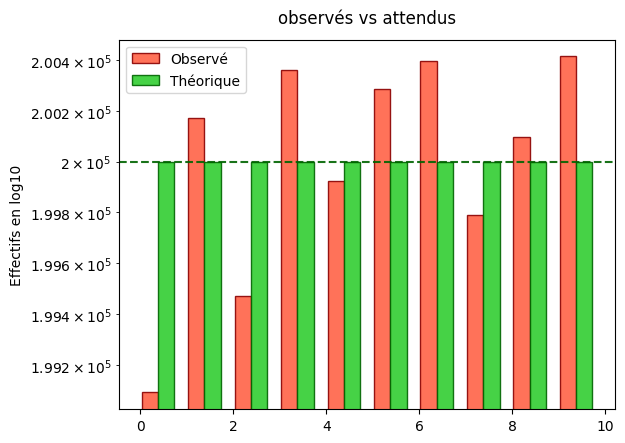

In [61]:
N = len(data)
p = N / 10

# Calcul des histogrammes
observed = np.bincount(data)
bins = np.arange(11)
bin_width = bins[1] - bins[0]

expected = np.full(len(observed),p)

# Positions des barres
obs_pos = bins[:-1] + bin_width * 0.2
exp_pos = bins[:-1] + bin_width * 0.55
bar_width = bin_width * 0.35

# Tracé des barres
plt.bar(obs_pos, observed, width=bar_width,
        color='tomato', edgecolor='darkred',
        label='Observé', alpha=0.9)

plt.bar(exp_pos, expected,
        width=bar_width, color='limegreen',
        edgecolor='darkgreen', label='Théorique',
        alpha=0.9)
plt.axhline(N/10, color='darkgreen', linestyle='--', alpha=0.9)

# Personnalisation
plt.title(f'observés vs attendus', pad=12)
#plt.xlabel('Intervalles')
plt.ylabel('Effectifs en log10')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
# Calcul des erreurs
error = np.abs(observed - expected)
percent_error = (error / p)*100
#Affichage des erreurs des
print("-"*50)
print(f"| observed | expected | error | % error")
print("-"*50)
for i in range(len(observed)):
    print(f"| {observed[i]}   | {int(expected[i])}   | {int(error[i]):3d}   | {percent_error[i]:.2f} %")
print("-"*50)

chiffre | observed | expected | error | % error
--------------------------------------------------
0       | 199093   | 200000   | 907   | 0.45 %
1       | 200171   | 200000   | 171   | 0.09 %
2       | 199471   | 200000   | 529   | 0.26 %
3       | 200361   | 200000   | 361   | 0.18 %
4       | 199923   | 200000   |  77   | 0.04 %
5       | 200285   | 200000   | 285   | 0.14 %
6       | 200395   | 200000   | 395   | 0.20 %
7       | 199789   | 200000   | 211   | 0.11 %
8       | 200098   | 200000   |  98   | 0.05 %
9       | 200414   | 200000   | 414   | 0.21 %
--------------------------------------------------


|Digits | observé | Attendu| erreur abs| % erreur|
|:------:|:-------:|:------:|:---------:|:--------:|
|0|199093|200000|907|0.45%|
|1|200171|200000|171|0.09%|
|2|199471|200000|529|0.26%|
|3|200361|200000|361|0.18%|
|4|199923|200000|77|0.04%|
|5|200285|200000|285|0.14%|
|6|200395|200000|395|0.20%|
|7|199789|200000|211|0.11%|
|8|200098|200000|98|0.05%|
|9||200000|414|0.21%|


### Observations

On constate que : 
- On remarque d'abord que la repartition des effectifs de chaque classe n'est pas toujours uniforme  et égale effectifs attendus
- lorsqu'on reparti les nombres sur moins de 10 classes , les effectifs ne sont pas unifrome

on constates que pour chaque cas , 

## 1.2 Etude rigoureruse des décimales par les tests

pour cette étude comme pour la suite (compraison des performances des générateurs )

# 2. Notre Générateur
---


Après quelques petites recherches , sur différents algorithmes de nombres pseudo-aléatoires ( Von Neumann , RSA , XOTshift , Congruence linéaire ...). Nous avons optez pour l'utilisation d'une congruence linéaire ( plus accessibble pour nous parce que c'est une notion vu en cours ) combiné à un XORshift opération qui permettrait d'ajouter plus d'aléa


# 2.1 Fonctionnement du Générateur

un truc

# 2.2 choix des paramètres 

# 2.3 Algorithme python (voir fichier ``Generators.py``)